In [1]:
import myplotlib
import matplotlib.pyplot as plt
import tri

myplotlib.load("hershey")

In [2]:
# Change this to the path where your data is stored
PATH = "../temp/pb-00/out-01/"

In [9]:
# First combine the hdf5 files into a single file for faster loading
tri.CombineH5Files(PATH)

In [10]:
# Load the spectra at different times
spectra = tri.get(f"{PATH}/data.h5")
spectra

<xarray.Dataset>
Dimensions:  (t: 51, e: 300)
Coordinates:
  * t        (t) int64 0 10 20 30 40 50 60 70 ... 440 450 460 470 480 490 500
  * e        (e) float32 0.0001031 0.0001096 0.0001166 ... 9.12e+03 9.698e+03
Data variables:
    n1       (t, e) float32 dask.array<chunksize=(1, 300), meta=np.ndarray>
    n2       (t, e) float32 dask.array<chunksize=(1, 300), meta=np.ndarray>
    nr1      (t, e) float32 dask.array<chunksize=(1, 300), meta=np.ndarray>
    nr2      (t, e) float32 dask.array<chunksize=(1, 300), meta=np.ndarray>
Attributes: (12/112)
    NumSteps:                  51
    algorithm:c:               0.45
    algorithm:corr:            1.025
    algorithm:currdeposit:     0
    algorithm:fieldsolver:     0
    algorithm:nfilter:         0
    ...                        ...
    slice_output:sliceY_1:     -1.0
    slice_output:sliceZ_1:     -1.0
    slice_output:start:        0
    time:last:                 500
    time:wall_t_max:           0.0
    timestep:                  0

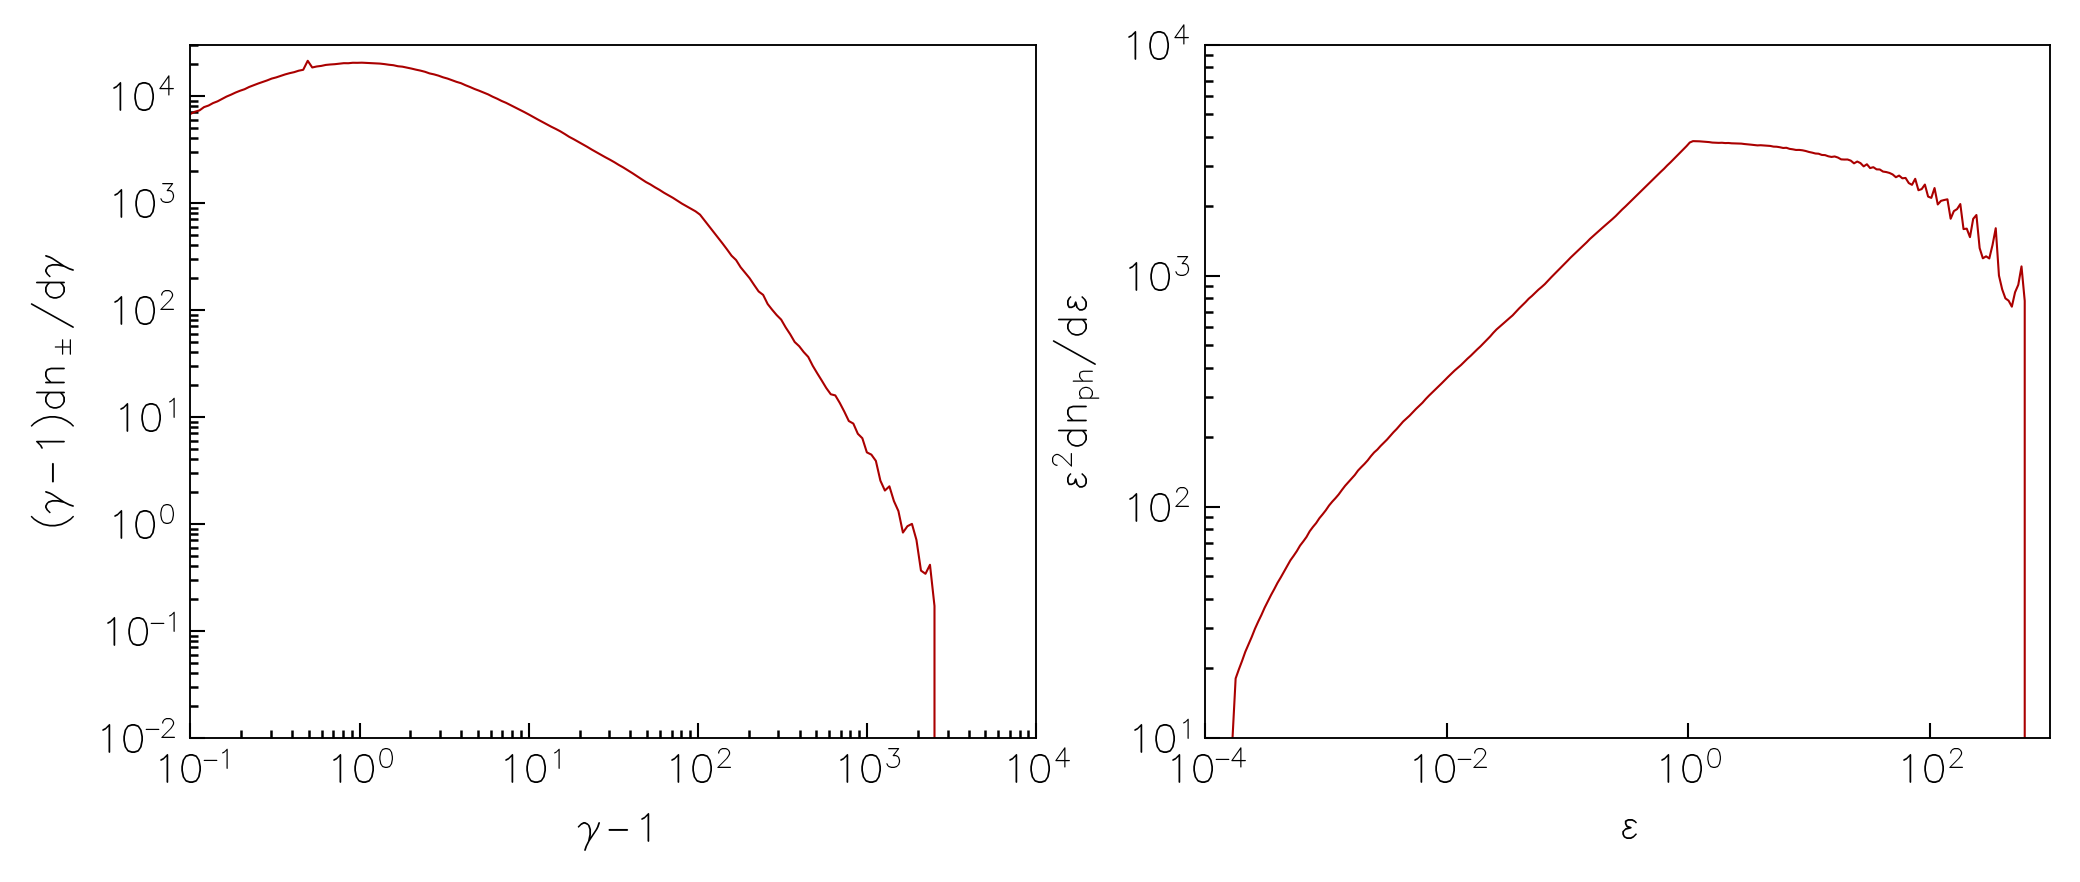

In [12]:
fig = plt.figure(figsize=(8, 3), dpi=300)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


ax1.plot(
    spectra.e,
    # average spectrum at time t > t_esc
    (spectra.n1 + spectra.n2)
    .sel(t=slice(spectra.attrs["problem:t_esc"], None))
    .mean("t"),
    c="C1",
)

ax1.set(
    xscale="log",
    yscale="log",
    xlim=(1e-1, 1e4),
    ylim=(1e-2, 3e4),
    xlabel=r"$\gamma-1$",
    ylabel=r"$(\gamma-1)dn_\pm /d\gamma$",
)

ax2.plot(
    spectra.e,
    # average spectrum at time t > t_esc
    spectra.e * (spectra.nr1 + spectra.nr2)
    .sel(t=slice(spectra.attrs["problem:t_esc"], None))
    .mean("t"),
    c="C1",
)

ax2.set(
    xscale="log",
    yscale="log",
    xlim=(1e-4, 1e3),
    ylim=(10, 1e4),
    xlabel=r"$\varepsilon$",
    ylabel=r"$\varepsilon^2 dn_{\rm ph}/d\varepsilon$"
);